In [10]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import json

# Confusion Matrix

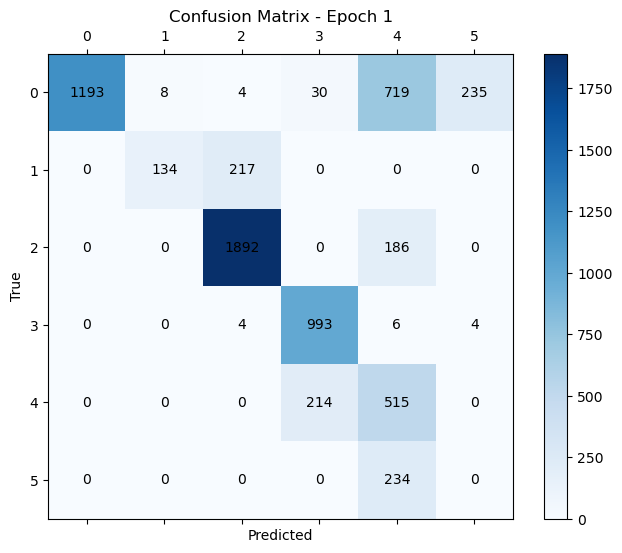

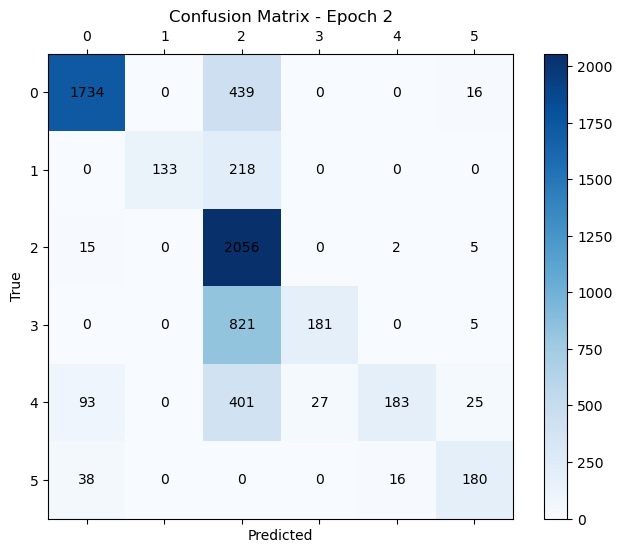

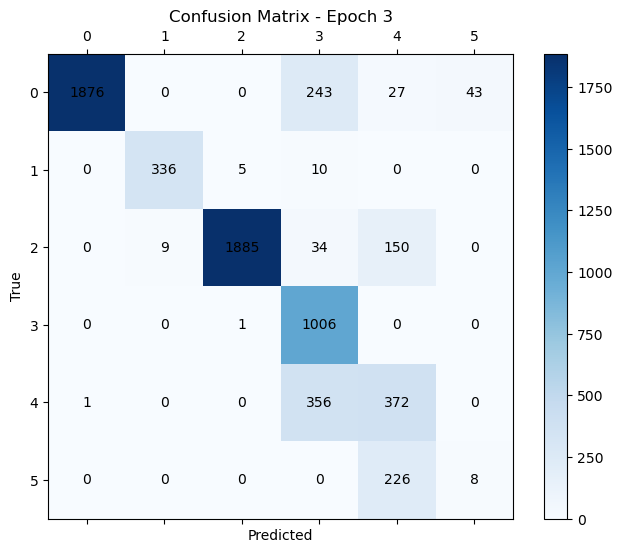

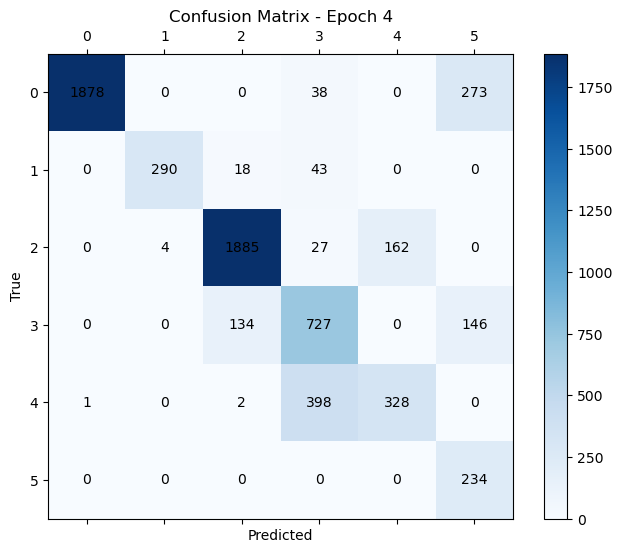

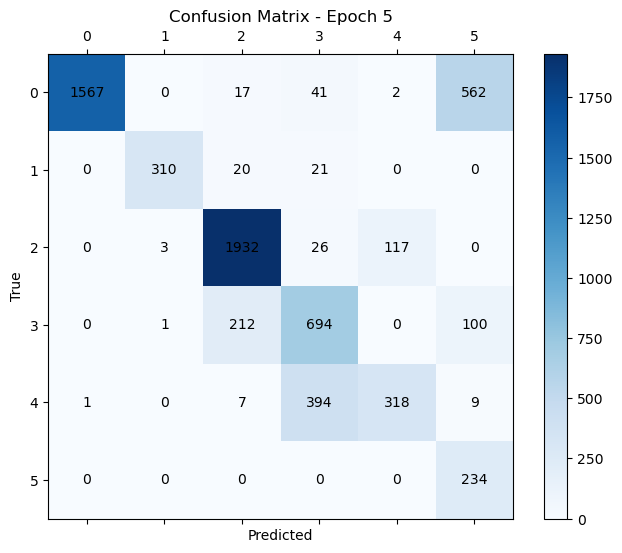

In [16]:
def plot_confusion_matrix(cm, labels, epoch):
	plt.figure(figsize=(8, 6))
	plt.matshow(cm, cmap='Blues', fignum=1)
	plt.colorbar()
	for (i, j), val in np.ndenumerate(cm):
		plt.text(j, i, f'{val}', ha='center', va='center')
	plt.xlabel('Predicted')
	plt.ylabel('True')
	plt.title(f'Confusion Matrix - Epoch {epoch + 1}')
	plt.show()

def parse_and_plot(json_data):
	labels = list(range(6))

	for epoch_idx, epoch_data in enumerate(json_data):
		true_labels = []
		pred_labels = []
		for true_label, predictions in epoch_data.values():
			true_labels.extend([true_label] * len(predictions))
			pred_labels.extend(predictions)

		cm = confusion_matrix(true_labels, pred_labels, labels=labels)
		plot_confusion_matrix(cm, labels, epoch_idx)

# Example JSON input
with open('../../results/qnn_preds.json', 'r') as f:
	json_input = json.load(f)

# Parse the JSON data and plot the confusion matrix for each epoch
parse_and_plot(json_input)

## Training Graphs

In [25]:
def plot_metrics(data, title):
	plt.title(title)
	loss = [epoch['loss'] for epoch in data]
	accuracy = [epoch['accuracy'] for epoch in data]
	plt.plot(loss, label='Loss')
	plt.plot(accuracy, label='Accuracy')
	plt.xticks(np.arange(len(data)), np.arange(len(data)) + 1)
	plt.legend()
	plt.show()

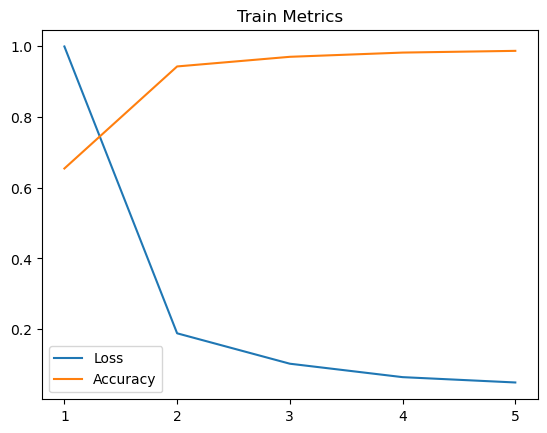

In [26]:
with open('../../results/qnn_train_metrics.json', 'r') as f:
	train_metrics = json.load(f)
plot_metrics(train_metrics, 'Train Metrics')

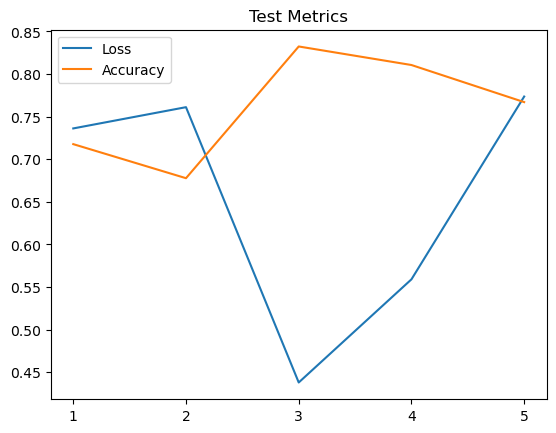

In [27]:
with open('../../results/qnn_test_metrics.json', 'r') as f:
	test_metrics = json.load(f)
plot_metrics(test_metrics, 'Test Metrics')